#**Lab 05 Logistic Classification(Regression) - Eager Execution**
* Logistic Classification은 True or False와 같은 Binary나 복수개의 다항 분류에 쓰인다.(Bernoulli Distribution)

##**기본 Libaray 선언 및 Tensorflow 버전 확인**

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.4.0


#**강의에 설명할 Data**

* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제
* Logistic Classification을 통해 보라색과 노란색 y_data(Label)을 구분
* Test 데이터는 붉은색의 위치와 같이 추론시 1의 값



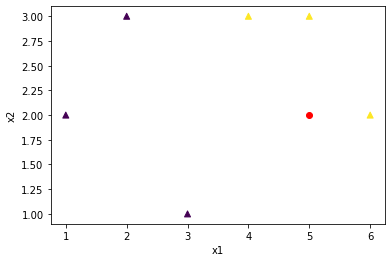

In [2]:
x_train = [
           [1., 2.],
           [2., 3.],
           [3., 1.],
           [4., 3.],
           [5., 3.],
           [6., 2.]
]
y_train = [
           [0.],
           [0.],
           [0.],
           [1.],
           [1.],
           [1.]
]

x_test = [[5., 2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors =[int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
          


#**Tensorflow Eager**

###**위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만든다.**

* Tensorflow data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다.)
* features, labels는 실제 학습에 쓰일 Data (연산을 위해 Type을 맞춘다.)


In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#repeat()

###**위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만든다.**

* W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias 

(초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([2,1]))

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

####**Sigmoid 함수를 가설로 선언**

* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴
tf.sigmoid(tf.matmul(X, W) + b)와 동일

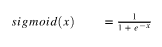

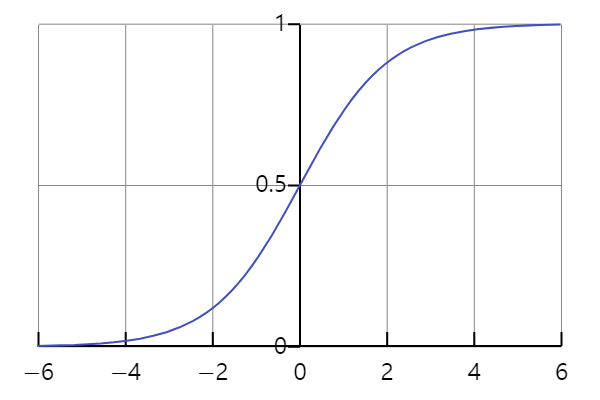

In [5]:
def logistic_regression(features):
  hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
  return hypothesis

###**가설을 검증할 Cost 함수를 정의**

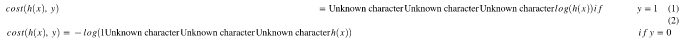

* 위의 두 식을 합치면 

image.png

In [6]:
def loss_fn(hypothesis, features, labels):
  cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

##**추론한 값은 0.5 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴**
* Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환
* 가설을 통해 실제 값과 비교한 정확성을 측정 

In [7]:
def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
  return accuracy

##**GradientTape을 통해 경사값을 계산**


In [8]:
def grad(features, labels):
  with tf.GradientTape() as tape:
    loss_value = loss_fn(logistic_regression(features), features, labels)
  return tape.gradient(loss_value, [W, b])

###**학습 실행**

* 위의 Data를 Cost 함수를 통해 학습시킨 뒤, 모델 생성
* 새로운 Data를 통한 검증수행 [5,2]의 Data로 테스트 수행(그래프상 1이 정상값)

In [9]:
EPOCHS = 1001

for step in range(EPOCHS):
  for features, labels in iter(dataset):
    grads = grad(features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if step % 50 == 0:
      print("{:5} | {:10.4f}".format(step, loss_fn(logistic_regression(features), features, labels)))

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Testset Accuracy: {:10.4f}".format(test_acc))

    0 |     0.6874
   50 |     0.6069
  100 |     0.5776
  150 |     0.5541
  200 |     0.5349
  250 |     0.5189
  300 |     0.5054
  350 |     0.4939
  400 |     0.4838
  450 |     0.4750
  500 |     0.4671
  550 |     0.4600
  600 |     0.4535
  650 |     0.4476
  700 |     0.4420
  750 |     0.4368
  800 |     0.4319
  850 |     0.4272
  900 |     0.4228
  950 |     0.4185
 1000 |     0.4144
Testset Accuracy:     1.0000
